In [1]:
import configparser
import json
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

#Capturando as configurações dos gráficos
configs = configparser.ConfigParser()
configs.read('../configuracoes_graficos.conf')

data_folder = configs['PRODUTOS']['pasta']

ios_path = Path(configs['PRODUTOS']['pasta'].encode('latin1').decode('utf-8')) #/ configs['PRODUTOS']['subpasta_ios']
itb_path = Path(configs['PRODUTOS']['pasta'].encode('latin1').decode('utf-8')) #/ configs['PRODUTOS']['subpasta_itb']
cidades = ['ilheus', 'itabuna']
produtos = ['acucar', 'arroz', 'banana', 'cafe', 'farinha', 'feijao', 'leite', 'manteiga', 'oleo', 'pao', 'carne', 'tomate']
quantidades = {'acucar':3.0, 'arroz':3.6, 'banana':7.5,  'cafe':0.3, 'carne':4.5, 'farinha':3.0, 'feijao':4.5, 'leite':6.0, 
               'manteiga':0.75, 'oleo':1.0, 'pao':6.0, 'tomate':12.0  }

sub_pasta_ios = configs['PRODUTOS']['subpasta_ios']
sub_pasta_itb = configs['PRODUTOS']['subpasta_itb']

ios_path2 = ios_path / sub_pasta_ios
itb_path2 = itb_path / sub_pasta_itb

#Plotando graficos
meses_anteriores = configs['CESTA_BASICA']['meses_anteriores']
meses_anteriores = meses_anteriores.split(',')
meses_previstos = configs['CESTA_BASICA']['meses_previstos']
meses_previstos = meses_previstos.split(',')
limite_y = configs['PRODUTOS']['eixo_y_limite_sup']
limite_y = int(limite_y) + 1
line_size = 3
xlabel = meses_anteriores + meses_previstos

marks = ['s', '.', 'v', 'p', 'p', 'X', '*', 'D', '^', '8', 'P', '>']
colors_prev = ['#0004c7', '#c9261a', '#c1c718', '#57210a', '#6fad11', '#039eff', '#ffb100', '#00fa08', '#ff0044', '#210109', '#780c6d',
               '#b200b5']
colors_real = ['#7578ff', '#e6837c', '#c0c28c', '#634b41', '#aac77f', '#aadbfa', '#f7d381', '#a2fca4', '#f79cb4', '#736e6f', '#854e7f',
               '#c877c9']
margens = [-1, -1, -2, 2, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 7, 6]
markers_size = [8, 17, 10, 10, 10, 10, 15, 8, 10, 10, 10, 10]

modelo = configs['CESTA_BASICA']['modelo_atual']

## Carregar valores reais e previstos 

In [2]:
#capturando resultados de ilhéus
previsoes_ios = {}
previsoes_itb = {}

for produto in produtos:
    produto_path = ios_path2 / f"previsao_{modelo}_{produto}_{cidades[0]}.json"
    with open(produto_path,'r') as file:
        temp = []
        previsao = json.load(file)
        previsao[produto] = previsao[produto].replace('[','')
        previsao[produto] = previsao[produto].replace(']','')
        temp = previsao[produto].split(',')
        temp = list(map(float,temp))
        temp = [previsto/quantidades[produto] * 1000 for previsto in temp]
        previsoes_ios[produto] = temp

#capturando resultados de itabuna
for produto in produtos:
    produto_path = itb_path2 / f"previsao_{modelo}_{produto}_{cidades[1]}.json"
    with open(produto_path,'r') as file:
        temp = []
        previsao = json.load(file)
        previsao[produto] = previsao[produto].replace('[','')
        previsao[produto] = previsao[produto].replace(']','')
        temp = previsao[produto].split(',')
        temp = list(map(float,temp))  
        temp = [previsto/quantidades[produto] * 1000 for previsto in temp]
        previsoes_itb[produto] = temp
        
#Capturando os valores reais
valores_reais_ios = {}
valores_reais_itb = {}

reais_pasta = data_folder

sub_pasta_ios = configs['PRODUTOS']['subpasta_valores_reais_ios']
sub_pasta_itb = configs['PRODUTOS']['subpasta_valores_reais_itb']
ios_path2 = ios_path / sub_pasta_ios
itb_path2 = itb_path / sub_pasta_itb
#Capturando os valores de Ilhéus
for produto in produtos:
    produto_path = reais_pasta + sub_pasta_ios
    file_path = f"{produto}_ilheus.xlsx"
    produto_path = ios_path2 / file_path
    df = pd.read_excel(produto_path)
    temp = df['preco'].tail(9).to_list()   
    temp = [valor/quantidades[produto] for valor in temp]
    valores_reais_ios[produto] = temp

#Capturando os valores de Itabuna
for produto in produtos:
    produto_path = reais_pasta + sub_pasta_itb
    file_path = f"{produto}_itabuna.xlsx"
    produto_path = itb_path2 / file_path
    df = pd.read_excel(produto_path)  
    temp = df['preco'].tail(9).to_list()   
    temp = [valor/quantidades[produto] for valor in temp]
    valores_reais_itb[produto] = temp

## Plotar Gráfico Ilhéus

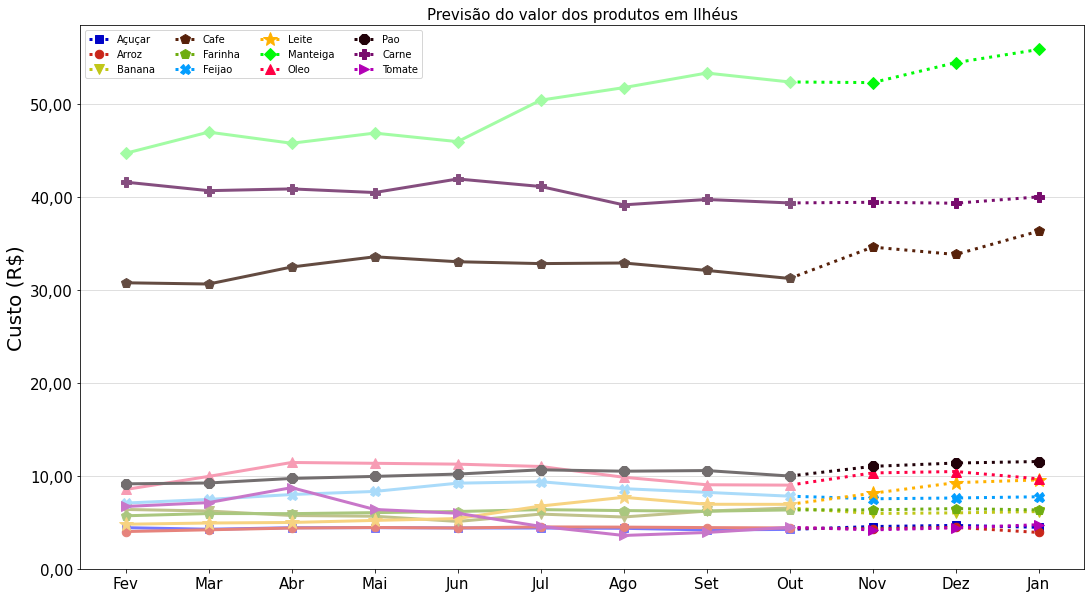

In [3]:
plt.figure(figsize=(18, 10))

#Plot - Ilhéus
for produto, mark, color_prev, color_real, margem, marker_size in zip(produtos, marks, colors_prev, colors_real, margens, markers_size):
    plt.plot([8,9],[valores_reais_ios[produto][-1],previsoes_ios[produto][0]],":",color=color_prev,lw=line_size, markersize=marker_size)
    plt.plot([x for x in range(9)],valores_reais_ios[produto], marker=mark, color=color_real,lw=line_size, markersize=marker_size)
    plt.plot([9,10,11],previsoes_ios[produto],":" ,marker=mark, label=produto.title().replace('c','ç'),color=color_prev,lw=line_size, 
             markersize=marker_size)
    
#----------------------------------------------------
plt.xticks([x for x in range(0,12)],xlabel,size=15)
plt.ylabel("Custo (R$)",size=20)
plt.yticks([y for y in range(0,limite_y,10)],[format(y,".2f").replace(".",",") for y in range(0,limite_y,10)],size=15)
plt.grid(which='major', axis='y', alpha=0.5)
#----------
plt.title("Previsão do valor dos produtos em Ilhéus", size=15)
plt.legend(ncol=4)
plt.savefig(fname=f'figuras/produtos_ilheus/previsao_{modelo}_produtos_ilheus.png')    

# Plotar Gráfico Itabuna

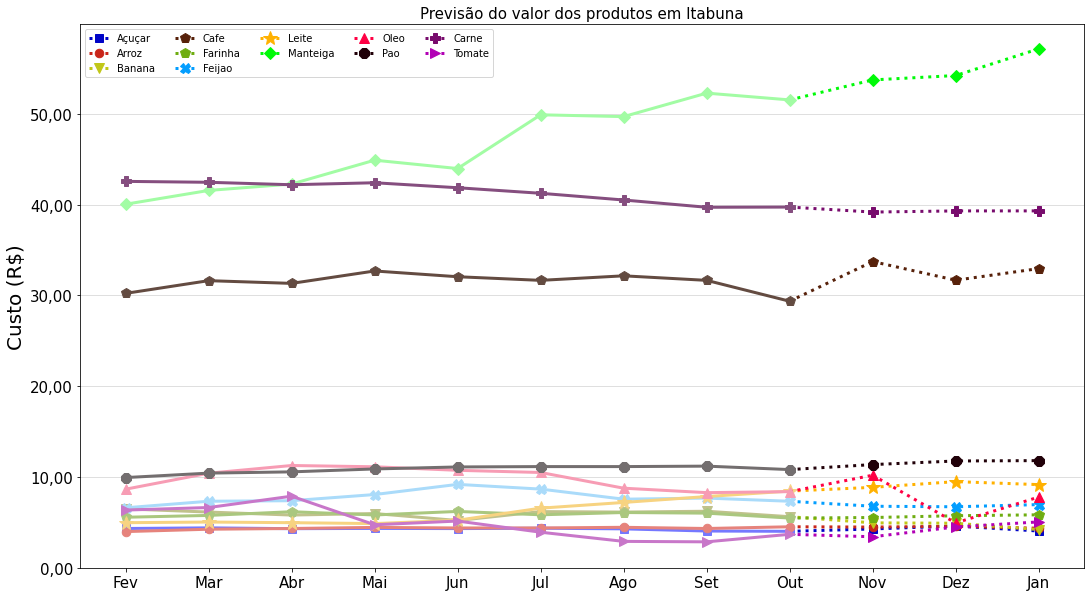

In [4]:
plt.figure(figsize=(18, 10))

for produto, mark, color_prev, color_real, margem, marker_size in zip(produtos, marks, colors_prev, colors_real, margens, markers_size):
    plt.plot([8,9],[valores_reais_itb[produto][-1],previsoes_itb[produto][0]],":",color=color_prev,lw=line_size, markersize=marker_size)
    plt.plot([x for x in range(9)],valores_reais_itb[produto], marker=mark, color=color_real,lw=line_size, markersize=marker_size)
    plt.plot([9,10,11],previsoes_itb[produto],":" ,marker=mark, label=produto.title().replace('c','ç'),color=color_prev,lw=line_size, 
             markersize=marker_size)
    
#----------------------------------------------------
plt.xticks([x for x in range(0,12)],xlabel,size=15)
plt.ylabel("Custo (R$)",size=20)
plt.yticks([y for y in range(0,limite_y,10)],[format(y,".2f").replace(".",",") for y in range(0,limite_y,10)],size=15)
plt.grid(which='major', axis='y', alpha=0.5)
#----------
plt.title("Previsão do valor dos produtos em Itabuna", size=15)
plt.legend(ncol=5)
plt.savefig(fname=f'figuras/produtos_itabuna/previsao_{modelo}_produtos_itabuna.png')